In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression,Lasso,RidgeCV
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


#设置中文字体
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  
matplotlib.rcParams['axes.unicode_minus']=False  #正常显示负号

from plotnine import *
import plotnine
plotnine.options.base_family='SimHei'
from warnings import filterwarnings
#过滤警告信息
filterwarnings("ignore")

In [3]:
#读取数据
raw_data=pd.read_excel('raw_data.xlsx',index_col=0)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 1 to 405
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   电池类型         405 non-null    object 
 1   PN结位置        405 non-null    object 
 2   IBC          405 non-null    object 
 3   双面           405 non-null    object 
 4   c-Si厚度       405 non-null    object 
 5   c-Si电阻率      405 non-null    object 
 6   c-Si晶相       405 non-null    object 
 7   c-Si提拉方式     405 non-null    object 
 8   材料           405 non-null    object 
 9   制备方式         405 non-null    object 
 10  厚度           405 non-null    object 
 11  poly-Si沉积方式  405 non-null    object 
 12  poly-Si厚度    405 non-null    object 
 13  poly-Si掺杂方式  405 non-null    object 
 14  额外掺杂         405 non-null    object 
 15  晶化温度         405 non-null    object 
 16  氢化方式         405 non-null    object 
 17  VOC          405 non-null    object 
 18  JSC          405 non-null    object 
 19  FF      

# 数据清洗

In [4]:
raw_data.columns

Index(['电池类型', 'PN结位置', 'IBC', '双面', 'c-Si厚度', 'c-Si电阻率', 'c-Si晶相', 'c-Si提拉方式',
       '材料', '制备方式', '厚度', 'poly-Si沉积方式', 'poly-Si厚度', 'poly-Si掺杂方式', '额外掺杂',
       '晶化温度', '氢化方式', 'VOC', 'JSC', 'FF', 'Efficiency'],
      dtype='object')

In [5]:
raw_data['电池类型'].value_counts()

n          340
p           62
n-mc-Si      3
Name: 电池类型, dtype: int64

In [6]:
raw_data['PN结位置'].value_counts()

前    261
背    144
Name: PN结位置, dtype: int64

In [7]:
raw_data['IBC'].value_counts()

否    371
是     34
Name: IBC, dtype: int64

In [8]:
raw_data['双面'].value_counts()

否    314
是     91
Name: 双面, dtype: int64

In [9]:
raw_data['c-Si晶相'].value_counts()

—      217
100    184
111      4
Name: c-Si晶相, dtype: int64

In [10]:
raw_data['c-Si提拉方式'].value_counts()

CZ    238
FZ    124
—      43
Name: c-Si提拉方式, dtype: int64

In [11]:
#材料
raw_data['材料'].value_counts()

SiOx    386
AlOx      8
SiNx      5
—         3
AlNx      3
Name: 材料, dtype: int64

In [12]:
#制备方式
raw_data['制备方式'].value_counts()

thermal       132
HNO3          127
O3             36
plasma         33
ALD            31
—              20
H2O2            9
PECVD           8
N2O             6
DIO3            1
HNO3/H2SO4      1
H2O2/H2SO4      1
Name: 制备方式, dtype: int64

In [13]:
#poly-Si沉积方式
raw_data['poly-Si沉积方式'].value_counts()

LPCVD         232
PECVD         152
—              17
HWCVD           2
Sputtering      2
Name: poly-Si沉积方式, dtype: int64

In [14]:
#额外掺杂
raw_data['额外掺杂'].value_counts()

无    351
C     40
O      9
—      4
N      1
Name: 额外掺杂, dtype: int64

In [15]:
#poly-Si掺杂方式
raw_data['poly-Si掺杂方式'].value_counts()

in-situ             187
diffusion           114
ion-implantation     90
—                    10
spin-coated           3
Ink                   1
Name: poly-Si掺杂方式, dtype: int64

In [16]:
#氢化方式
raw_data['氢化方式'].value_counts()

H-rich layers    285
RPHP              56
FGA               50
—                 13
H2O                1
Name: 氢化方式, dtype: int64

In [17]:
df=raw_data.copy()

#c-Si厚度
df['c-Si厚度']=np.where(df['c-Si厚度']=='—',np.nan,df['c-Si厚度'])
df['c-Si厚度']=df['c-Si厚度'].astype(float)

#c-Si电阻率
df['c-Si电阻率']=np.where(df['c-Si电阻率']=='—',np.nan,df['c-Si电阻率'])
df['c-Si电阻率']=df['c-Si电阻率'].astype(float)

#厚度
df['厚度']=np.where(df['厚度']=='—',np.nan,df['厚度'])
df['厚度']=df['厚度'].astype(float)

#poly-Si厚度
df['poly-Si厚度']=np.where(df['poly-Si厚度']=='—',np.nan,df['poly-Si厚度'])
df['poly-Si厚度']=df['poly-Si厚度'].astype(float)

#晶化温度
df['晶化温度']=np.where(df['晶化温度']=='—',np.nan,df['晶化温度'])
df['晶化温度']=df['晶化温度'].astype(float)

#VOC
df['VOC']=np.where(df['VOC']=='—',np.nan,df['VOC'])
df['VOC']=df['VOC'].astype(float)
#JSC
df['JSC']=np.where(df['JSC']=='—',np.nan,df['JSC'])
df['JSC']=df['JSC'].astype(float)
#FF
df['FF']=np.where(df['FF']=='—',np.nan,df['FF'])
df['FF']=df['FF'].astype(float)

df_na=df.copy()
#用平均值填充缺失值
df['c-Si厚度']=df['c-Si厚度'].fillna(df['c-Si厚度'].mean())
df['c-Si电阻率']=df['c-Si电阻率'].fillna(df['c-Si电阻率'].mean())
df['厚度']=df['厚度'].fillna(df['厚度'].mean())
df['poly-Si厚度']=df['poly-Si厚度'].fillna(df['poly-Si厚度'].mean())
df['晶化温度']=df['晶化温度'].fillna(df['晶化温度'].mean())

df['c-Si晶相']=df['c-Si晶相'].astype(str)
#删除因变量带有缺失值的样本
df=df.dropna(subset=['VOC','JSC','FF'])
#删除效率低于20的样本
df=df[df['Efficiency']>20]

# 自变量相关性分析

In [18]:
#选择数值变量，然后计算pearson相关系数矩阵
num_cols=['c-Si厚度','c-Si电阻率','厚度','poly-Si厚度','晶化温度']
df_na[num_cols].corr(method='pearson')

,c-Si厚度,c-Si电阻率,厚度,poly-Si厚度,晶化温度
c-Si厚度,1.000000,0.181304,-0.297054,-0.095908,-0.037546
c-Si电阻率,0.181304,1.000000,0.084739,-0.037863,0.010255
厚度,-0.297054,0.084739,1.000000,0.131105,0.163914
poly-Si厚度,-0.095908,-0.037863,0.131105,1.000000,-0.025029
晶化温度,-0.037546,0.010255,0.163914,-0.025029,1.000000


<AxesSubplot:>

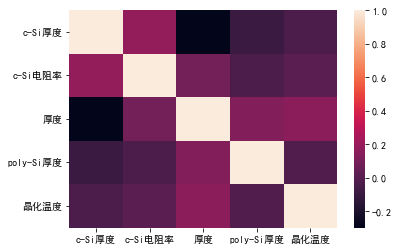

In [19]:
sns.heatmap(df_na[num_cols].corr(method='pearson'))

# 因变量之间的相关性分析

In [20]:
#计算因变量之间的pearson相关系数
df_na[['VOC', 'JSC', 'FF', 'Efficiency']].corr()

,VOC,JSC,FF,Efficiency
VOC,1.000000,0.372604,0.526772,0.756395
JSC,0.372604,1.000000,0.354478,0.795283
FF,0.526772,0.354478,1.000000,0.584717
Efficiency,0.756395,0.795283,0.584717,1.000000


<AxesSubplot:>

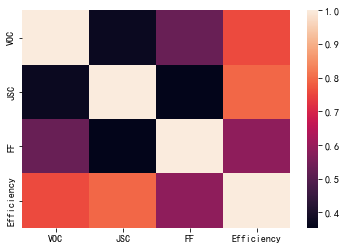

In [21]:
sns.heatmap(df_na[['VOC', 'JSC', 'FF', 'Efficiency']].corr())

## 数值自变量与因变量pearson相关系数分析

In [22]:
#数值自变量与因变量pearson相关系数分析
df_na[num_cols+['VOC', 'JSC', 'FF', 'Efficiency']].corr(method='pearson')

,c-Si厚度,c-Si电阻率,厚度,poly-Si厚度,晶化温度,VOC,JSC,FF,Efficiency
c-Si厚度,1.000000,0.181304,-0.297054,-0.095908,-0.037546,-0.178133,-0.308520,-0.379253,-0.312181
c-Si电阻率,0.181304,1.000000,0.084739,-0.037863,0.010255,0.053053,0.108923,0.002667,0.090506
厚度,-0.297054,0.084739,1.000000,0.131105,0.163914,0.468502,0.366220,0.571124,0.437192
poly-Si厚度,-0.095908,-0.037863,0.131105,1.000000,-0.025029,0.165391,0.107356,0.199435,0.118656
晶化温度,-0.037546,0.010255,0.163914,-0.025029,1.000000,0.040599,-0.059021,0.139506,-0.007152
VOC,-0.178133,0.053053,0.468502,0.165391,0.040599,1.000000,0.372604,0.526772,0.756395
JSC,-0.308520,0.108923,0.366220,0.107356,-0.059021,0.372604,1.000000,0.354478,0.795283
FF,-0.379253,0.002667,0.571124,0.199435,0.139506,0.526772,0.354478,1.000000,0.584717
Efficiency,-0.312181,0.090506,0.437192,0.118656,-0.007152,0.756395,0.795283,0.584717,1.000000


## 类别自变量与因变量的关系分析

In [23]:
#选择类别自变量
discrete_cols=['电池类型','PN结位置','IBC','双面','c-Si晶相','c-Si提拉方式','材料',
               '制备方式','poly-Si沉积方式','poly-Si掺杂方式','额外掺杂','氢化方式']
df_long=pd.melt(df,id_vars=discrete_cols,value_vars=['VOC', 'JSC', 'FF', 'Efficiency'])
df_long.head()

,电池类型,PN结位置,IBC,双面,c-Si晶相,c-Si提拉方式,材料,制备方式,poly-Si沉积方式,poly-Si掺杂方式,额外掺杂,氢化方式,variable,value
0,n,前,否,否,100,FZ,SiOx,HNO3,—,in-situ,无,H-rich layers,VOC,690.8
1,n,前,否,否,100,FZ,SiOx,HNO3,—,in-situ,无,H-rich layers,VOC,687.4
2,n,前,否,否,100,FZ,SiOx,HNO3,—,in-situ,无,H-rich layers,VOC,698.1
3,n,前,否,否,100,CZ,SiOx,thermal,PECVD,diffusion,无,H-rich layers,VOC,674.6
4,n,前,否,否,100,FZ,SiOx,HNO3,PECVD,diffusion,无,RPHP,VOC,672.6


In [24]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   电池类型         1216 non-null   object 
 1   PN结位置        1216 non-null   object 
 2   IBC          1216 non-null   object 
 3   双面           1216 non-null   object 
 4   c-Si晶相       1216 non-null   object 
 5   c-Si提拉方式     1216 non-null   object 
 6   材料           1216 non-null   object 
 7   制备方式         1216 non-null   object 
 8   poly-Si沉积方式  1216 non-null   object 
 9   poly-Si掺杂方式  1216 non-null   object 
 10  额外掺杂         1216 non-null   object 
 11  氢化方式         1216 non-null   object 
 12  variable     1216 non-null   object 
 13  value        1216 non-null   float64
dtypes: float64(1), object(13)
memory usage: 133.1+ KB


In [25]:
df.head()

,电池类型,PN结位置,IBC,双面,c-Si厚度,c-Si电阻率,c-Si晶相,c-Si提拉方式,材料,制备方式,厚度,poly-Si沉积方式,poly-Si厚度,poly-Si掺杂方式,额外掺杂,晶化温度,氢化方式,VOC,JSC,FF,Efficiency
1,n,前,否,否,200.000000,1.00,100,FZ,SiOx,HNO3,1.4,—,20.0,in-situ,无,800.0,H-rich layers,690.8,38.4,82.1,21.81
4,n,前,否,否,200.000000,1.00,100,FZ,SiOx,HNO3,1.4,—,20.0,in-situ,无,800.0,H-rich layers,687.4,39.6,82.3,22.40
5,n,前,否,否,200.000000,1.00,100,FZ,SiOx,HNO3,1.4,—,20.0,in-situ,无,800.0,H-rich layers,698.1,40.6,81.1,23.02
9,n,前,否,否,203.434375,3.00,100,CZ,SiOx,thermal,1.2,PECVD,32.0,diffusion,无,800.0,H-rich layers,674.6,38.4,80.4,20.80
10,n,前,否,否,195.000000,0.75,100,FZ,SiOx,HNO3,1.4,PECVD,15.0,diffusion,无,800.0,RPHP,672.6,40.8,79.7,21.90


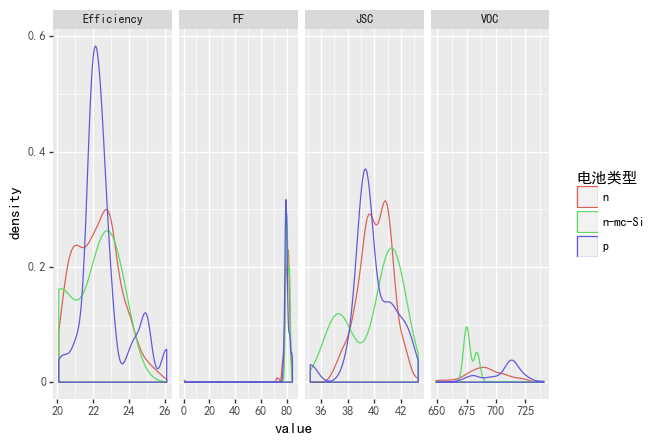

<ggplot: (152441620267)>

In [26]:
#电池类型
ggplot(df_long,aes("value"))+geom_density(aes(colour='电池类型'))+facet_grid('~variable',scales='free')

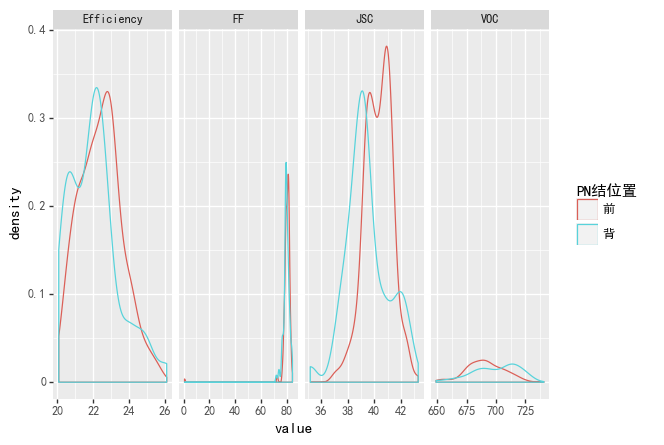

<ggplot: (152441561501)>

In [27]:
#PN结位置
ggplot(df_long,aes("value"))+geom_density(aes(colour='PN结位置'))+facet_grid('~variable',scales='free')

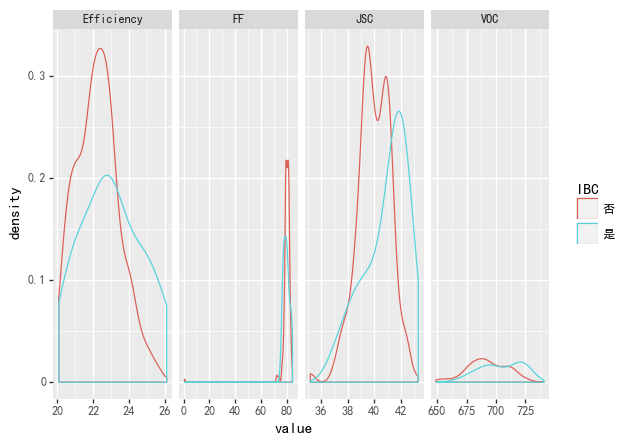

<ggplot: (152443010446)>

In [28]:
#IBC
ggplot(df_long,aes("value"))+geom_density(aes(colour='IBC'))+facet_grid('~variable',scales='free')

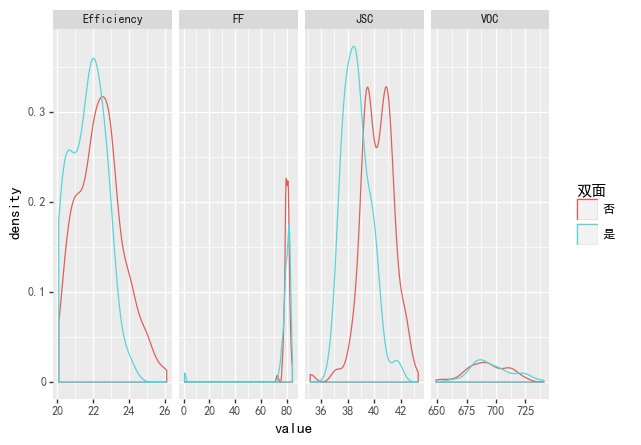

<ggplot: (152441559486)>

In [29]:
#双面
ggplot(df_long,aes("value"))+geom_density(aes(colour='双面'))+facet_grid('~variable',scales='free')

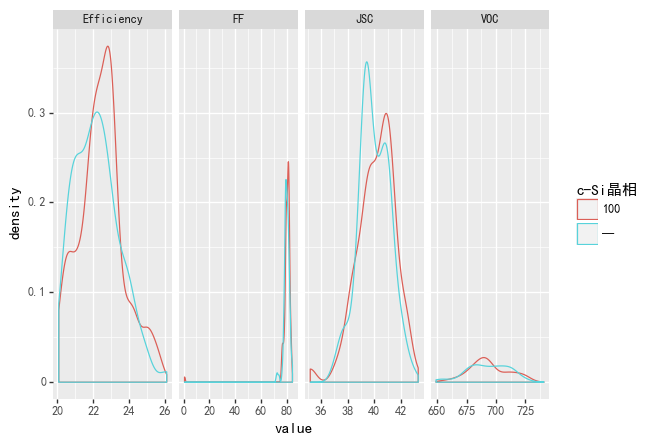

<ggplot: (152443023580)>

In [30]:
#c-Si晶相
ggplot(df_long,aes("value"))+geom_density(aes(colour='c-Si晶相'))+facet_grid('~variable',scales='free')

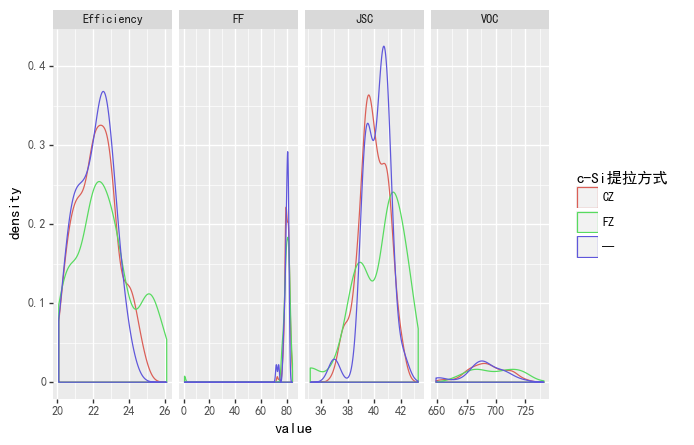

<ggplot: (152441637000)>

In [31]:
#c-Si提拉方式
ggplot(df_long,aes("value"))+geom_density(aes(colour='c-Si提拉方式'))+facet_grid('~variable',scales='free')

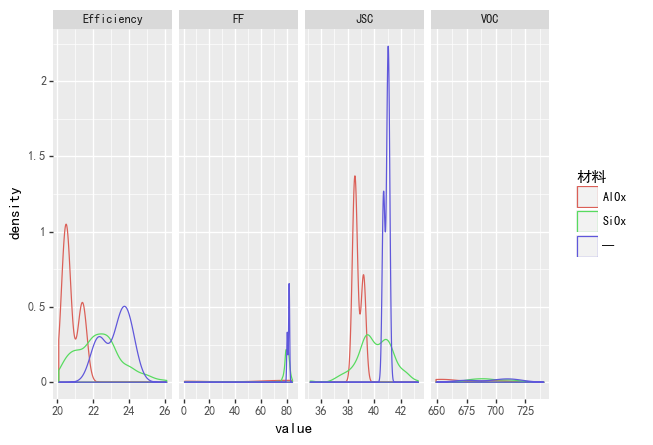

<ggplot: (152443423434)>

In [32]:
#材料
ggplot(df_long,aes("value"))+geom_density(aes(colour='材料'))+facet_grid('~variable',scales='free')

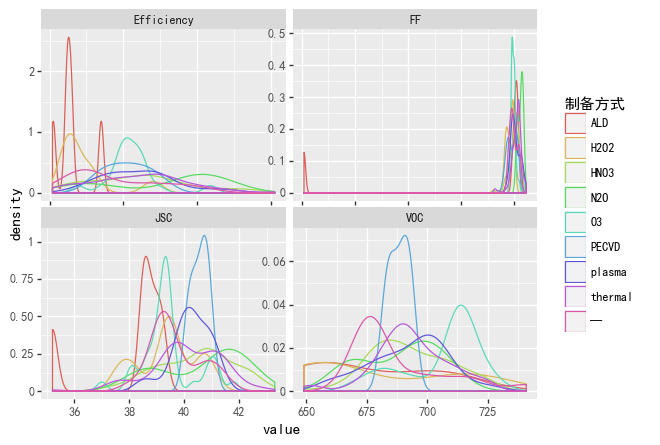

<ggplot: (152443006636)>

In [33]:
#制备方式
ggplot(df_long,aes("value"))+geom_density(aes(colour='制备方式'))+facet_wrap('~variable',scales='free')

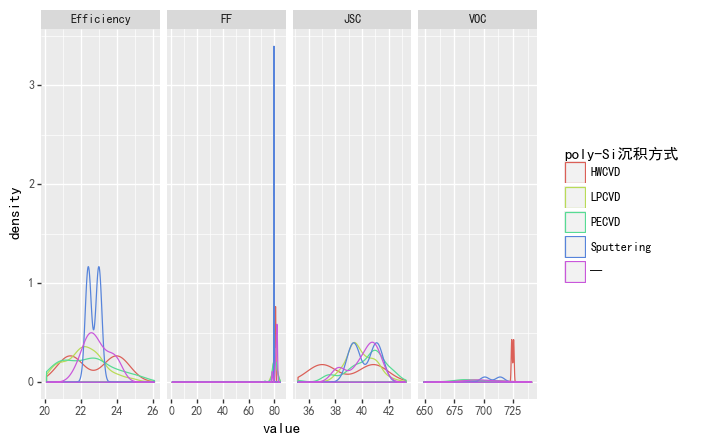

<ggplot: (152443803447)>

In [34]:
#poly-Si沉积方式
ggplot(df_long,aes("value"))+geom_density(aes(colour='poly-Si沉积方式'))+facet_grid('~variable',scales='free')

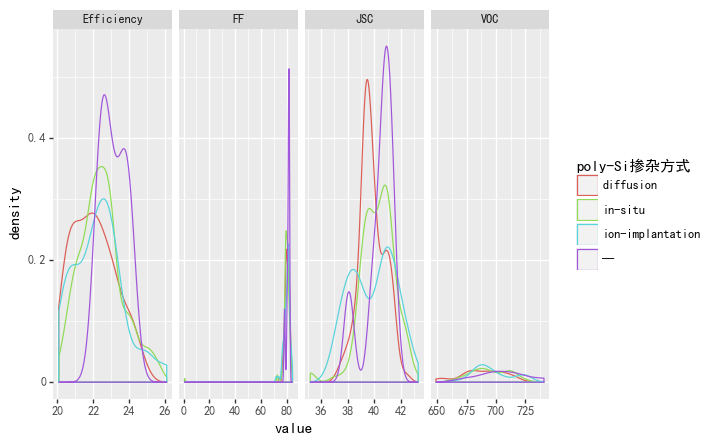

<ggplot: (152445515183)>

In [35]:
#poly-Si掺杂方式
ggplot(df_long,aes("value"))+geom_density(aes(colour='poly-Si掺杂方式'))+facet_grid('~variable',scales='free')

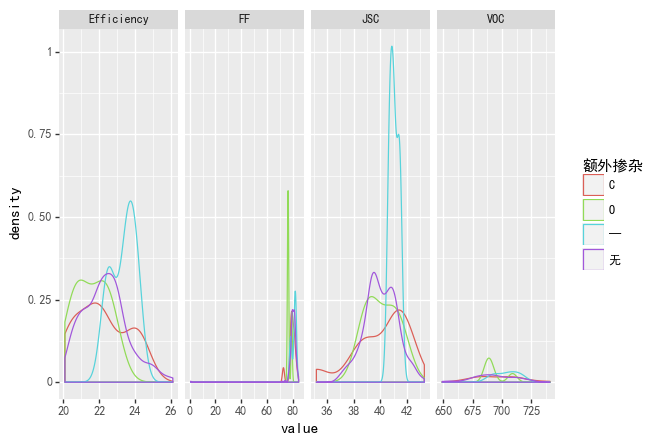

<ggplot: (152443805675)>

In [36]:
#额外掺杂
ggplot(df_long,aes("value"))+geom_density(aes(colour='额外掺杂'))+facet_grid('~variable',scales='free')

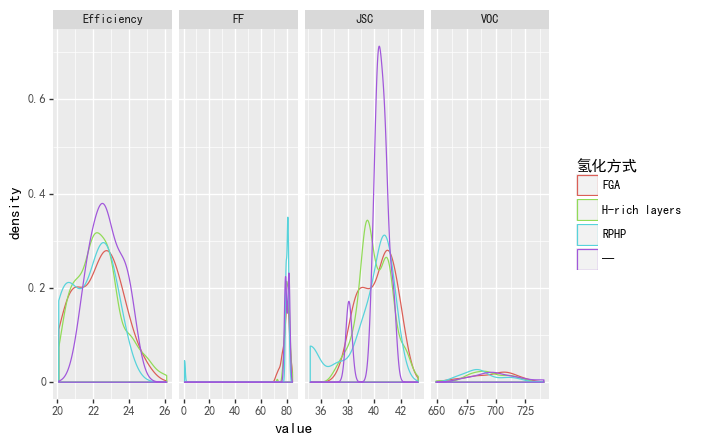

<ggplot: (152443600580)>

In [37]:
#氢化方式
ggplot(df_long,aes("value"))+geom_density(aes(colour='氢化方式'))+facet_grid('~variable',scales='free')

# 特征工程

In [38]:
#对类别变量进行one-hot编码
X=pd.get_dummies(df.drop(columns=['VOC','JSC','FF','Efficiency']),drop_first=True)
y1=df['VOC']
y2=df['JSC']
y3=df['FF']
y4=df['Efficiency']
#['VOC', 'JSC', 'FF', 'Efficiency']

In [39]:
X.head(10)

,c-Si厚度,c-Si电阻率,厚度,poly-Si厚度,晶化温度,电池类型_n-mc-Si,电池类型_p,PN结位置_背,IBC_是,双面_是,c-Si晶相_—,c-Si提拉方式_FZ,c-Si提拉方式_—,材料_SiOx,材料_—,制备方式_H2O2,制备方式_H2O2/H2SO4,制备方式_HNO3,制备方式_HNO3/H2SO4,制备方式_N2O,制备方式_O3,制备方式_PECVD,制备方式_plasma,制备方式_thermal,制备方式_—,poly-Si沉积方式_LPCVD,poly-Si沉积方式_PECVD,poly-Si沉积方式_Sputtering,poly-Si沉积方式_—,poly-Si掺杂方式_in-situ,poly-Si掺杂方式_ion-implantation,poly-Si掺杂方式_—,额外掺杂_N,额外掺杂_O,额外掺杂_—,额外掺杂_无,氢化方式_H-rich layers,氢化方式_H2O,氢化方式_RPHP,氢化方式_—
1,200.000000,1.00,1.400000,20.0,800.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
4,200.000000,1.00,1.400000,20.0,800.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
5,200.000000,1.00,1.400000,20.0,800.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
9,203.434375,3.00,1.200000,32.0,800.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
10,195.000000,0.75,1.400000,15.0,800.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
11,200.000000,1.00,1.400000,15.0,800.0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
12,200.000000,1.00,1.400000,15.0,800.0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
13,200.000000,1.00,1.453305,15.0,800.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
14,150.000000,5.00,1.453305,15.0,800.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
15,200.000000,5.00,1.453305,15.0,800.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0


In [40]:
#训练集和测试集划分,训练集75%,测试集25%
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y1,test_size=0.25,random_state=1)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y2,test_size=0.25,random_state=1)
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y3,test_size=0.25,random_state=1)
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y4,test_size=0.25,random_state=1)

In [41]:
X_train1.shape

(228, 40)

In [42]:
X_test1.shape

(76, 40)

# 建模

In [44]:
#定义一个模型训练和预测函数
def train_predict(X_train=X_train1,X_test=X_test1,y_train=y_train1,y_test=y_test1,
                  response_variable='VOC',
                  base_estimators=['lasso','rf','bp']):    

    ###Lasso线性回归
    print('----------------------------Lasso线性回归-----------------------------------')
    lasso=Lasso()
    #定义参数区间
    param1={'alpha':[1e-3,1e-2,1e-1,1,1e1,1e2,1e3]}

    # 5折交叉验证寻找最佳参数
    reg1=GridSearchCV(lasso,param1,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')
    reg1.fit(X_train,y_train)

    #最佳参数
    print(reg1.best_params_)
    #rmse
    print(-reg1.best_score_)


    ###随机森林回归
    print('-----------------------------随机森林回归-----------------------------------')
    #定义参数区间
    param2={'n_estimators':range(100,600,50),
           'max_depth':range(5,15)}
    rf=RandomForestRegressor(random_state=0)
    # 5折交叉验证寻找最佳参数
    reg2=GridSearchCV(rf,param2,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')
    reg2.fit(X_train,y_train)

    #最佳参数
    print(reg2.best_params_)
    #rmse
    print(-reg2.best_score_)


    #输出特征重要性
    print('---------------输出特征重要性-----------------')
    feature_importance=pd.Series(reg2.best_estimator_.feature_importances_,index=X_train.columns)
    #对特征重要性进行排序
    importance=feature_importance.sort_values(ascending=False)
    print(importance)
    #重要性柱状图
    print(importance[:10].plot.barh())

    ###人工神经网络
    print('-----------------------------人工神经网络-----------------------------------')
    param3={'hidden_layer_sizes':[(50,),(100),(50,50),(100,100)],
            'alpha':[1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}
    mlp=MLPRegressor(random_state=1,max_iter=1000)
    # 5折交叉验证寻找最佳参数
    reg3=GridSearchCV(mlp,param3,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')
    reg3.fit(X_train,y_train)

    #最佳参数
    print(reg3.best_params_)
    #rmse
    print(-reg3.best_score_)

    ###Stacking 
    estimators_all= {'lasso':('lasso',reg1),
                'rf':('rf',reg2),
                'bp':('bp',reg3)}
    
    reg4=StackingRegressor(estimators=[estimators_all[m] for m in base_estimators],
                           final_estimator=RidgeCV())
    reg4.fit(X_train,y_train)
    #模型性能比较
    print('-----------------------------模型性能比较-----------------------------------')
    models=[reg1,reg2,reg3,reg4]
    #r2 socre
    r2=[]
    #mae
    mae=[]
    #rmse
    rmse=[]
    #mape
    mape=[]

    for model in models:
        pred_test=model.predict(X_test)    
        r2.append(r2_score(y_test,pred_test))
        mae.append(mean_absolute_error(y_test,pred_test))
        rmse.append(mean_squared_error(y_test,pred_test,squared=False))
        mape.append(mean_absolute_percentage_error(y_test,pred_test))





    #将结果组合为数据框
    compare=pd.DataFrame({'r2':r2,
                         'mae':mae,
                         'rmse':rmse,
                         'mape':mape},index=['lasso','rf','bp','stacking'])
    print(compare)

    #输出真实值和预测值的对比
    df_compare=X_test.copy()
    df_compare[response_variable]=y_test
    df_compare[response_variable+'_lasso_pred']=reg1.predict(X_test)
    df_compare[response_variable+'_rf_pred']=reg2.predict(X_test)
    df_compare[response_variable+'_ann_pred']=reg3.predict(X_test)
    df_compare[response_variable+'_stacking_pred']=reg4.predict(X_test)
    df_compare.to_excel("df_compare_{}.xlsx".format(response_variable))
    
    

# VOC

----------------------------Lasso线性回归-----------------------------------
{'alpha': 1}
17.475748832556903
-----------------------------随机森林回归-----------------------------------
{'max_depth': 14, 'n_estimators': 300}
13.363917574191273
---------------输出特征重要性-----------------
c-Si电阻率                         0.223843
poly-Si厚度                       0.176740
c-Si厚度                          0.097407
晶化温度                            0.084650
厚度                              0.063031
电池类型_p                          0.054216
c-Si提拉方式_FZ                     0.041889
c-Si晶相_—                        0.024308
PN结位置_背                         0.022045
制备方式_O3                         0.018895
IBC_是                           0.015237
氢化方式_RPHP                       0.015076
poly-Si沉积方式_PECVD               0.014846
c-Si提拉方式_—                      0.014235
双面_是                            0.012295
制备方式_thermal                    0.010783
poly-Si掺杂方式_in-situ             0.010687
poly-Si沉积方式_—                

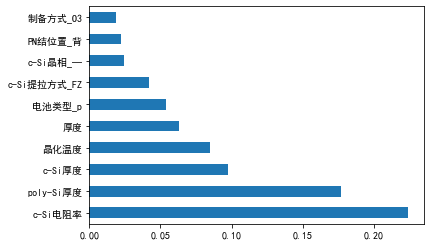

In [48]:
#VOC
train_predict(X_train=X_train1,X_test=X_test1,y_train=y_train1,y_test=y_test1,response_variable='VOC')

# JSC

----------------------------Lasso线性回归-----------------------------------
{'alpha': 0.01}
1.172646444992266
-----------------------------随机森林回归-----------------------------------
{'max_depth': 14, 'n_estimators': 300}
0.9463822890384381
---------------输出特征重要性-----------------
poly-Si厚度                       0.173747
双面_是                            0.155864
c-Si厚度                          0.120362
c-Si电阻率                         0.097581
晶化温度                            0.084608
厚度                              0.053256
氢化方式_RPHP                       0.046522
PN结位置_背                         0.037268
poly-Si沉积方式_PECVD               0.025920
c-Si提拉方式_FZ                     0.024273
电池类型_p                          0.018298
制备方式_O3                         0.018048
氢化方式_H-rich layers              0.016531
poly-Si沉积方式_LPCVD               0.015011
c-Si晶相_—                        0.014787
poly-Si掺杂方式_ion-implantation    0.014574
额外掺杂_无                          0.012340
IBC_是                      

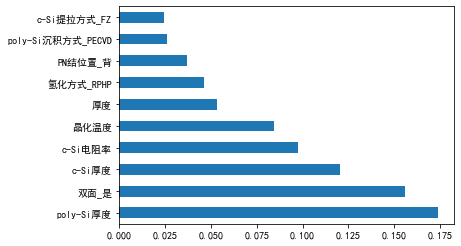

In [50]:
#JSC
train_predict(X_train=X_train2,X_test=X_test2,y_train=y_train2,y_test=y_test2,response_variable='JSC')

# FF

----------------------------Lasso线性回归-----------------------------------
{'alpha': 100.0}
3.917864389019067
-----------------------------随机森林回归-----------------------------------
{'max_depth': 11, 'n_estimators': 100}
3.9269525836137036
---------------输出特征重要性-----------------
c-Si厚度                          0.133846
厚度                              0.125160
晶化温度                            0.118332
poly-Si厚度                       0.116288
c-Si电阻率                         0.079008
氢化方式_RPHP                       0.073925
材料_SiOx                         0.066651
c-Si晶相_—                        0.047334
双面_是                            0.043368
poly-Si掺杂方式_in-situ             0.026656
c-Si提拉方式_FZ                     0.022603
氢化方式_H-rich layers              0.020284
c-Si提拉方式_—                      0.018307
poly-Si沉积方式_PECVD               0.014324
制备方式_thermal                    0.013844
poly-Si掺杂方式_ion-implantation    0.011852
额外掺杂_无                          0.009911
额外掺杂_O                    

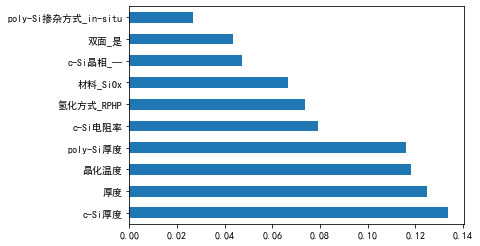

In [52]:
#FF
train_predict(X_train=X_train3,X_test=X_test3,y_train=y_train3,y_test=y_test3,response_variable='FF')

# Efficiency

----------------------------Lasso线性回归-----------------------------------
{'alpha': 0.01}
1.1860333745859422
-----------------------------随机森林回归-----------------------------------
{'max_depth': 13, 'n_estimators': 450}
0.8989165882495627
---------------输出特征重要性-----------------
c-Si电阻率                         0.244186
c-Si厚度                          0.210168
poly-Si厚度                       0.147127
晶化温度                            0.078495
厚度                              0.042381
氢化方式_RPHP                       0.031535
poly-Si沉积方式_PECVD               0.022235
PN结位置_背                         0.022117
c-Si晶相_—                        0.021605
额外掺杂_无                          0.019579
IBC_是                           0.019519
c-Si提拉方式_—                      0.013012
c-Si提拉方式_FZ                     0.012938
poly-Si沉积方式_—                   0.009856
poly-Si沉积方式_LPCVD               0.009806
制备方式_thermal                    0.009613
制备方式_HNO3                       0.009503
双面_是                      

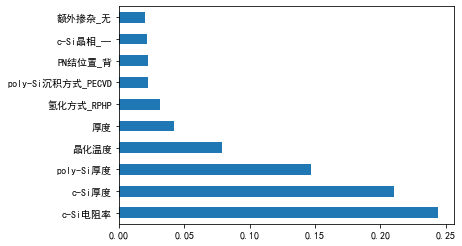

In [53]:
#Efficiency
train_predict(X_train=X_train4,X_test=X_test4,y_train=y_train4,y_test=y_test4,response_variable='Efficiency')

# 决策树

In [65]:
def dt_plot(X=X,y=y1):
    #定义参数区间
    param={'max_depth':range(2,20)}
    dt=DecisionTreeRegressor(random_state=0)
    #5折交叉验证寻找最佳参数
    reg=GridSearchCV(dt,param,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')
    reg.fit(X,y)

    #plot_tree决策树可视化
    fig,ax=plt.subplots(1,1,figsize=[24,14])
    _=plot_tree(reg.best_estimator_,          
              fontsize=12,
              ax=ax,
              feature_names=X.columns,
              filled=True,
              impurity=True,
             rounded=True)

In [ ]:
#['VOC', 'JSC', 'FF', 'Efficiency']

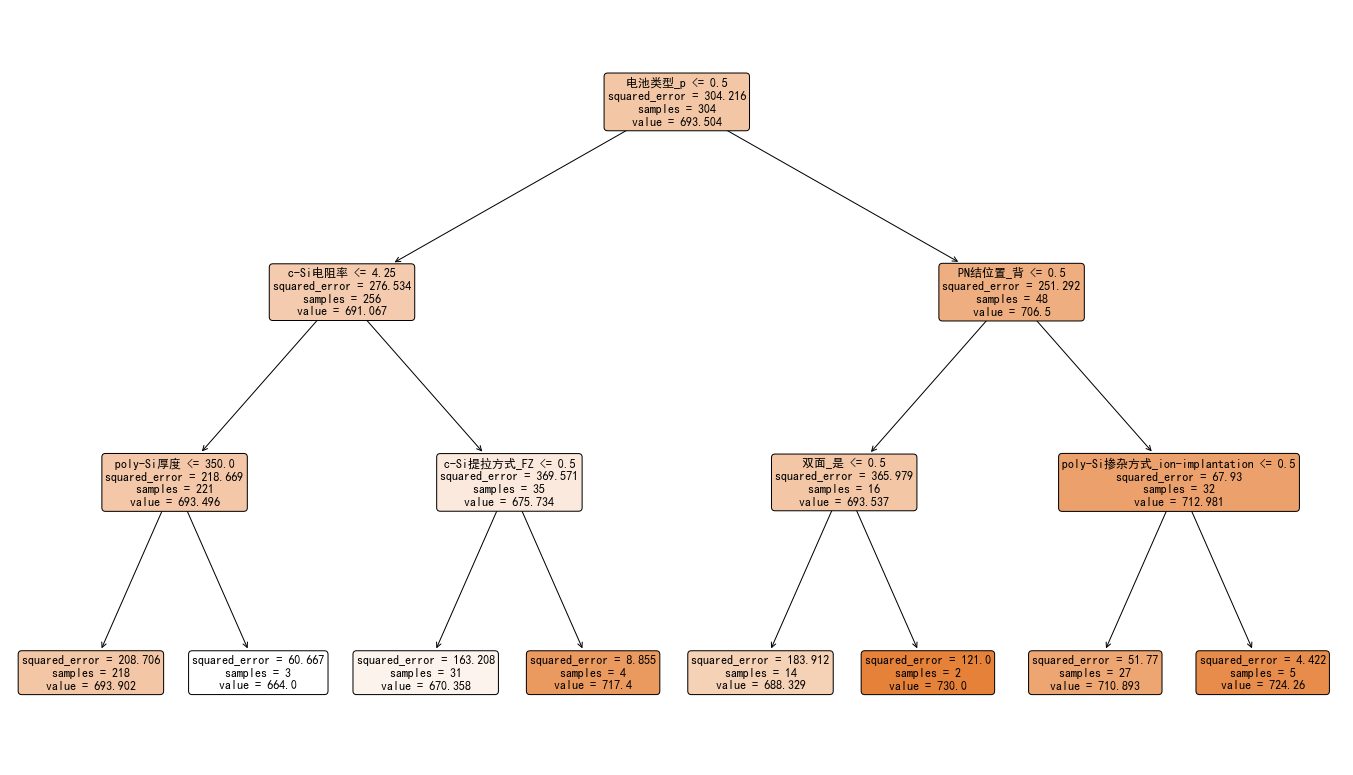

In [66]:
#VOC
dt_plot(X,y1)

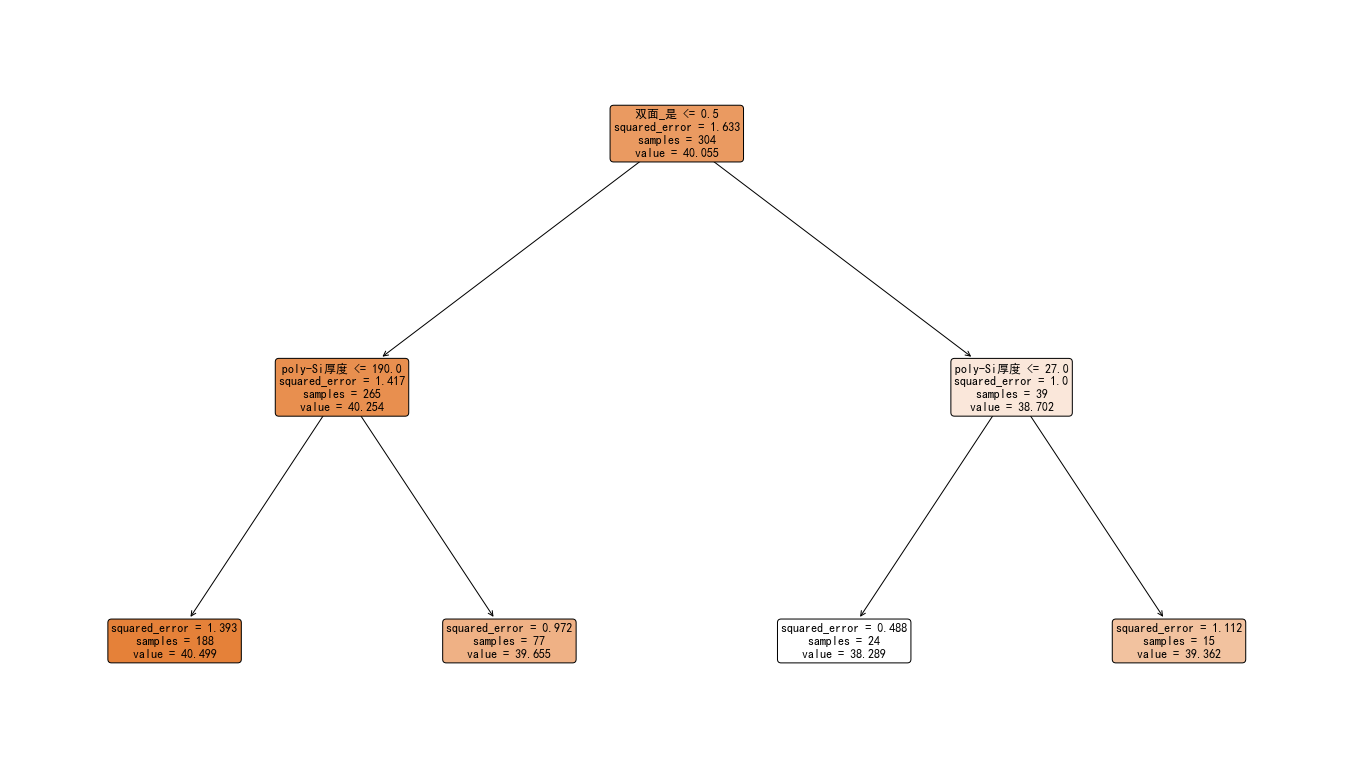

In [67]:
#JSC
dt_plot(X,y2)

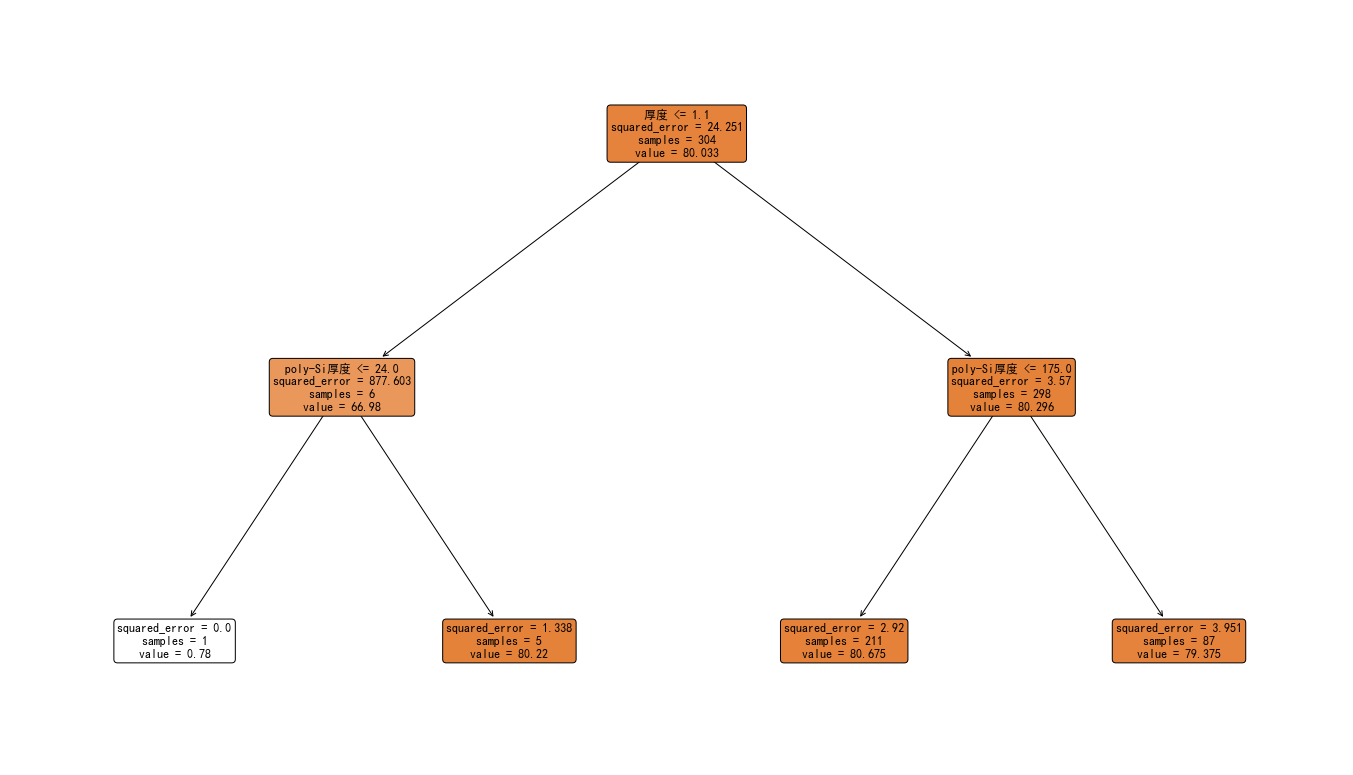

In [68]:
#FF
dt_plot(X,y3)

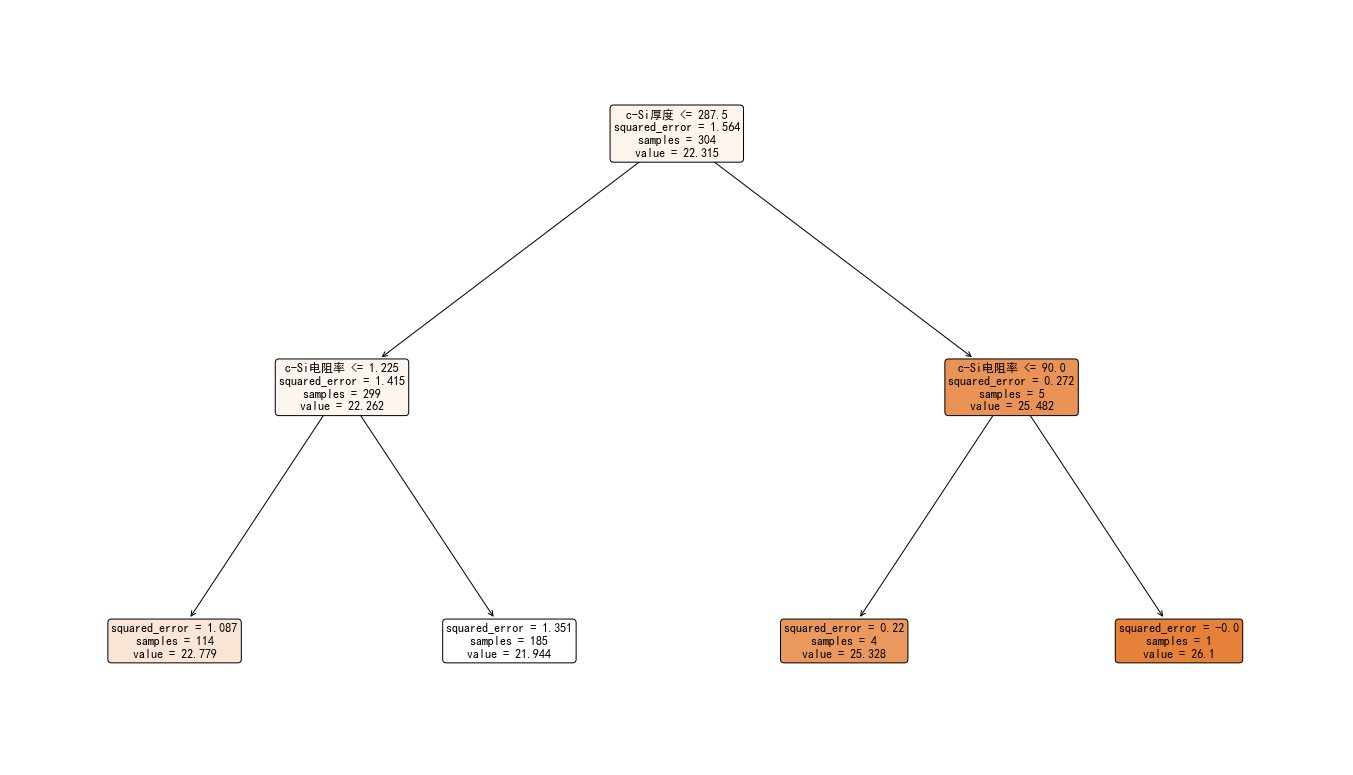

In [69]:
#Efficiency
dt_plot(X,y4)

对于Efficiency的决策树看出，当c-Si厚度>287.5 & c-Si电阻率>90时，电池效率最高，为26.1.
同时从上面的决策树可以看出c-Si厚度>287.5时，电池效率平均为25.482,c-Si厚度>287.5时的电池效率平均仅为22.262.